In [ ]:
import os
from pathlib import Path

input_directory = Path("/home/kdemyokhin_1/concept-tree-course-work/articles_triples_cleaned/arxiv-txt-cs")


# Получаем список всех txt файлов рекурсивно (включая поддиректории)
input_files = list(input_directory.rglob("*.txt"))

PICKLED_GRAPHS = "/home/kdemyokhin_1/concept-tree-course-work/pickled_graphs/"

In [14]:
from directed_graph.graph import Graph, load_graph

graph = Graph()

In [ ]:
import csv


added_edges = set()

for path in input_files:
    with open(path, newline='') as csvfile:
        triplets_reader = csv.reader(csvfile, delimiter=";")
        for triplet in triplets_reader:
            agent_1, action, agent_2 = triplet
            edge = (
                agent_1,
                agent_2,
                action,
            )
            if len(agent_1) == 0 or len(agent_2) == 0 or len(action) == 0:
                continue

            if edge not in added_edges:
                added_edges.add(edge)
                if edge[0] not in graph.vertices:
                    graph.add_vertex(edge[0])
                if edge[1] not in graph.vertices:
                    graph.add_vertex(edge[1])
                graph.add_edge(*edge)

In [ ]:
from directed_graph.graph import save_graph

save_graph(graph, PICKLED_GRAPHS+"raw_graph.pickle")

In [ ]:
# """
# Cluster vertices
# """

# from process_graph.squeezing import squeeze

# (
#     (words_to_cluster, merged_words_map),
#     (bigrams_to_cluster, merged_bigrams_map),
#     (trigrams_to_cluster, merged_trigrams_map),
# ) = squeeze((0.5, 0.5 * 1.41, 0.5 * 1.71), graph.vertices.values())

In [ ]:
# """
# Cluster edges
# """
# from process_graph.edges_clustering import cluster_edges_by_embeddings_dbscan

# edge_map = cluster_edges_by_embeddings_dbscan(graph.edges)

In [ ]:
# import tqdm

# clustered_graph = Graph()

# for new_vertice_words in merged_words_map.keys():
#     clustered_graph.add_vertex(new_vertice_words)
# for new_vertice_bigram in merged_bigrams_map.keys():
#     clustered_graph.add_vertex(new_vertice_bigram)
# for new_vertice_trigram in merged_trigrams_map.keys():
#     clustered_graph.add_vertex(new_vertice_trigram)

# def match_new_vertice(label: str) -> str:
#     if label in words_to_cluster:
#         return words_to_cluster[label]
#     elif label in bigrams_to_cluster:
#         return bigrams_to_cluster[label]
#     elif label in trigrams_to_cluster:
#         return trigrams_to_cluster[label]
#     return label


# added_edges = set()  # keeps added_edges in (agent_1, agent_2, label) format

# for edge in tqdm.tqdm(graph.edges):
#     new_edge = (
#         match_new_vertice(edge.agent_1),
#         match_new_vertice(edge.agent_2),
#         edge_map[edge.label] if edge.label in edge_map else edge.label,
#     )
#     if new_edge in added_edges:
#         continue
#     added_edges.add(new_edge)


#     if len(new_edge[0]) == 0 or len(new_edge[1]) == 0 or len(new_edge[2]) == 0:
#         print(f"{edge} <==> {new_edge}")

#     if new_edge[0] not in clustered_graph.vertices:
#         clustered_graph.add_vertex(new_edge[0])
#     if new_edge[1] not in clustered_graph.vertices:
#         clustered_graph.add_vertex(new_edge[1])

#     clustered_graph.add_edge(*new_edge)

100%|██████████| 4645/4645 [00:02<00:00, 1768.58it/s]


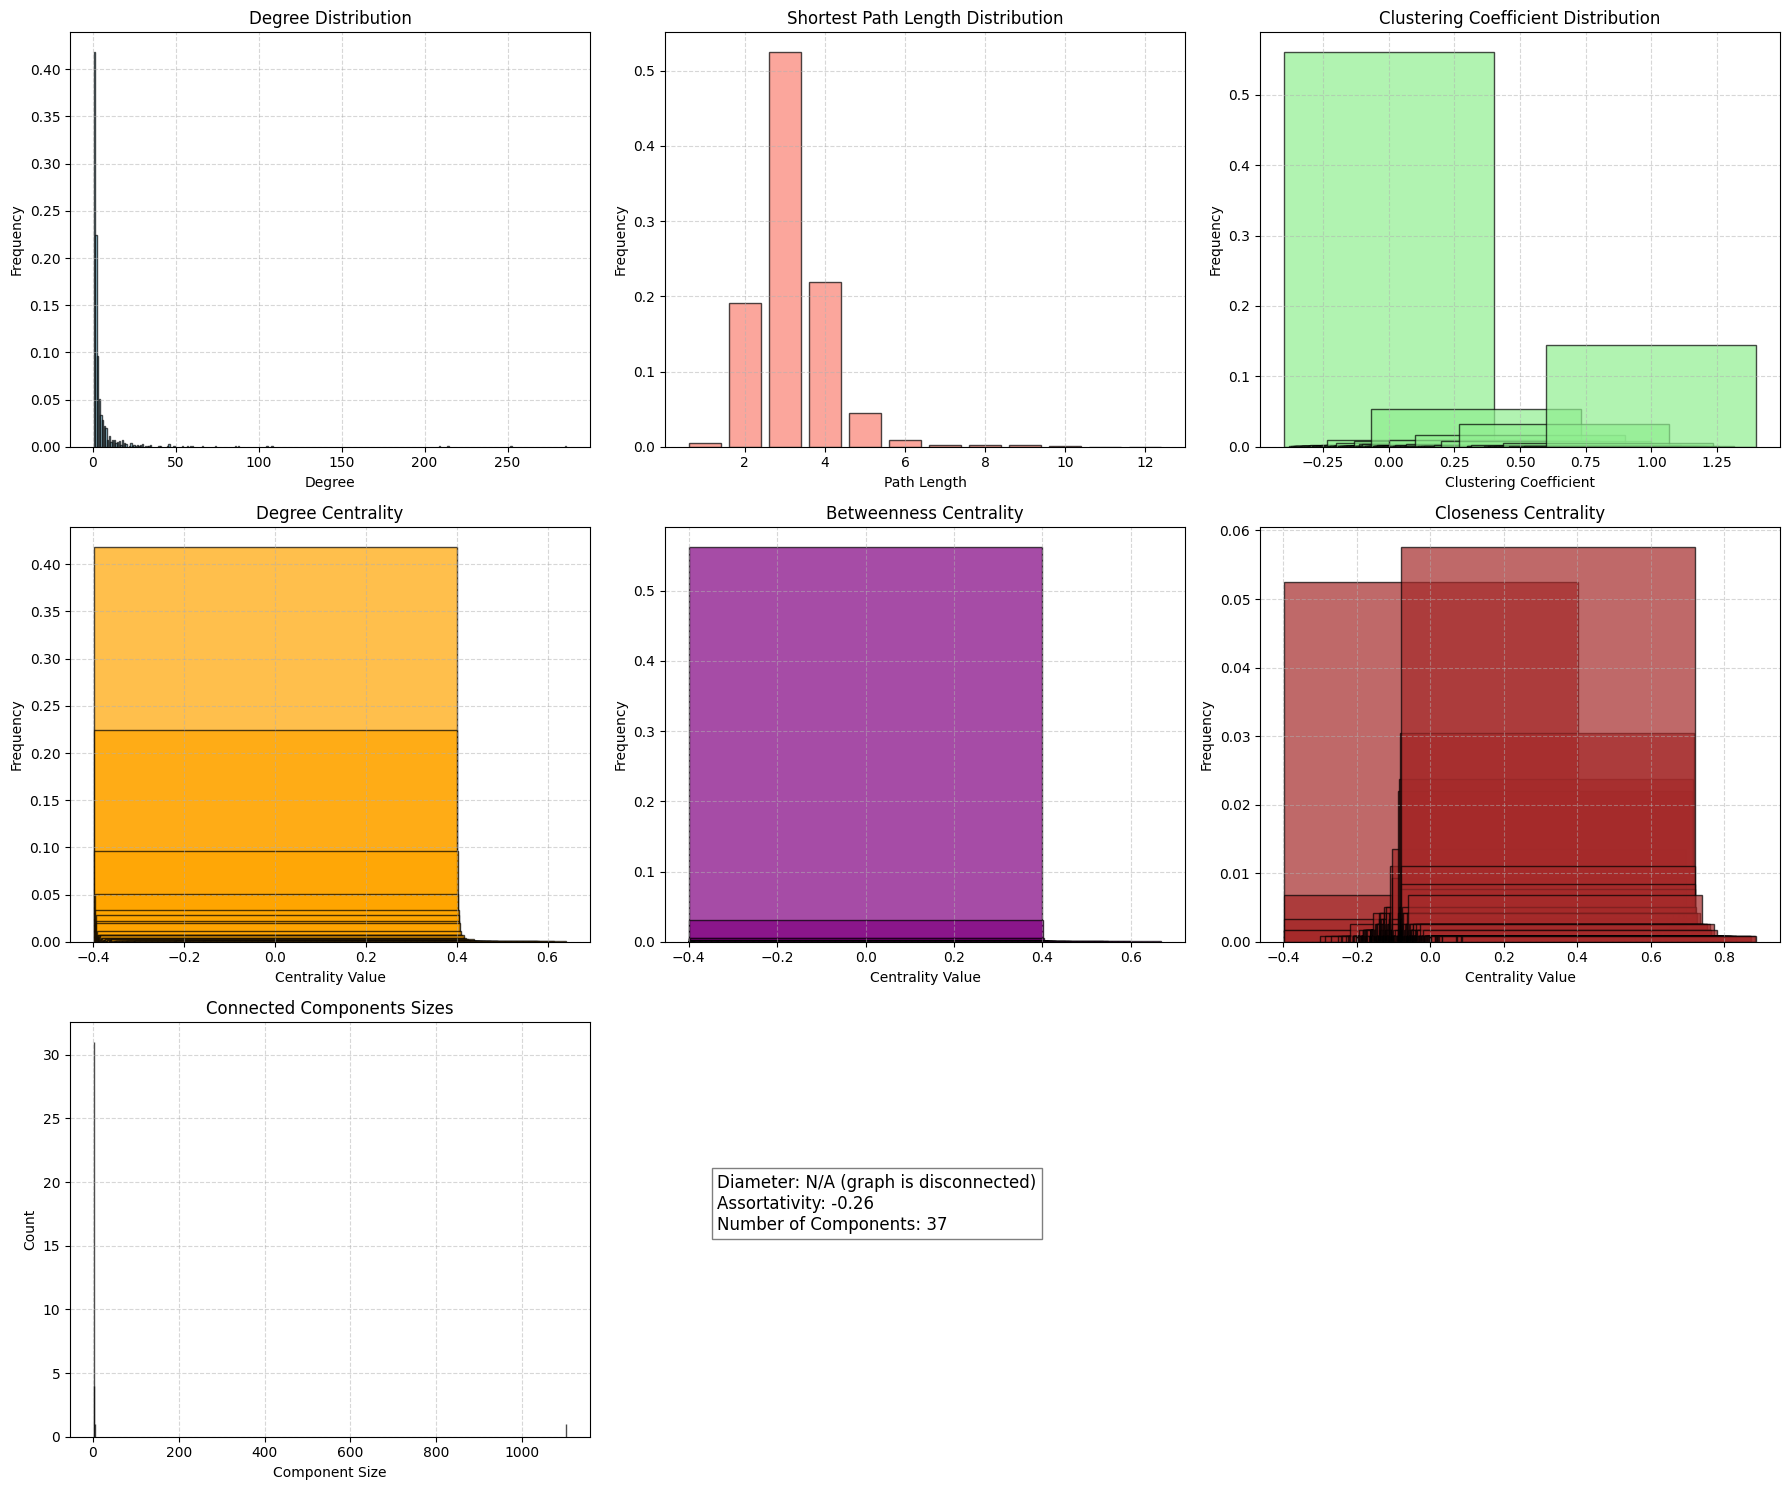

In [ ]:
# from graph_metrics.metrics import GraphMetrics

# metrics = GraphMetrics(clustered_graph)
# metrics.full_metrics_plot()

In [ ]:
# def find_squeezing_params(eps):
#     """
#     Cluster vertices
#     """

#     from process_graph.squeezing import squeeze

#     (
#         (words_to_cluster, merged_words_map),
#         (bigrams_to_cluster, merged_bigrams_map),
#         (trigrams_to_cluster, merged_trigrams_map),
#     ) = squeeze((eps, 1.41*eps, 1.73*eps), graph.vertices.values())

#     """
#     Cluster edges
#     """
#     from process_graph.edges_clustering import cluster_edges_by_embeddings_dbscan

#     edge_map = cluster_edges_by_embeddings_dbscan(graph.edges)

#     clustered_graph = Graph()

#     for new_vertice_words in merged_words_map.keys():
#         clustered_graph.add_vertex(new_vertice_words, new_vertice_words.split()[:3])
#     for new_vertice_bigram in merged_bigrams_map.keys():
#         clustered_graph.add_vertex(new_vertice_bigram, new_vertice_bigram.split()[:3])
#     for new_vertice_trigram in merged_trigrams_map.keys():
#         clustered_graph.add_vertex(new_vertice_trigram, new_vertice_trigram.split()[:3])

#     def match_new_vertice(label: str) -> str:
#         if label in words_to_cluster:
#             return words_to_cluster[label]
#         elif label in bigrams_to_cluster:
#             return bigrams_to_cluster[label]
#         elif label in trigrams_to_cluster:
#             return trigrams_to_cluster[label]
#         return label

#     added_edges = set()  # keeps added_edges in (agent_1, agent_2, label) format

#     for edge in tqdm.tqdm(graph.edges):
#         new_edge = (
#             match_new_vertice(edge.agent_1),
#             match_new_vertice(edge.agent_2),
#             edge_map[edge.label] if edge.label in edge_map else edge.label,
#         )
#         if new_edge in added_edges:
#             continue

#         clustered_graph.add_edge(*new_edge)
    

#     metrics = GraphMetrics(clustered_graph)
#     return sum(metrics.connected_components().values()), len(clustered_graph.vertices)
    

In [ ]:
# import numpy as np

# n_components = []
# n_vertices = []
# for eps in np.arange(0, 1, 0.1):
#     n_comp, n_vert = find_squeezing_params(eps)
#     n_components.append(n_comp)
#     n_vertices.append(n_vert)

100%|██████████| 2050/2050 [00:00<00:00, 2673.40it/s]


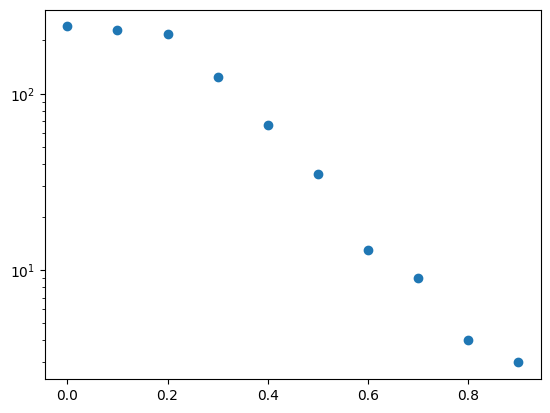

In [ ]:
# import matplotlib.pyplot as plt

# scale = list(np.arange(0, 1, 0.1))
# plt.scatter(scale, n_components)
# plt.semilogy();

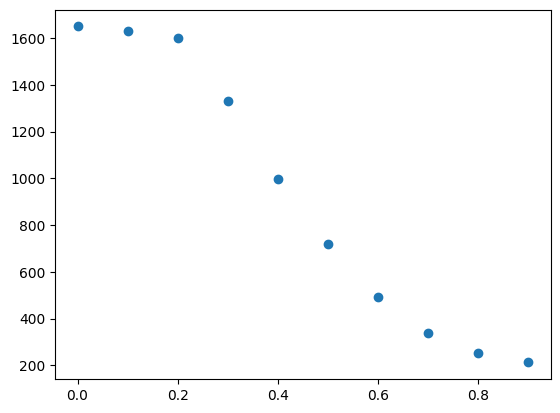

In [ ]:
# import matplotlib.pyplot as plt

# scale = list(np.arange(0, 1, 0.1))
# plt.scatter(scale, n_vertices);

In [ ]:
# from directed_graph.visualize_graph import visualize_graph_ngrams
# visualize_graph_ngrams(clustered_graph)

In [ ]:
# print("Words:")
# for item in merged_words_map.items():
#     if len(item[1]) > 1:
#         print(item)

# print("Bigrams:")
# for item in merged_bigrams_map.items():
#     if len(item[1]) > 1:
#         print(item)

# print("Trigrams:")
# for item in merged_trigrams_map.items():
#     if len(item[1]) > 1:
#         print(item)

Words:
('01', ['01', '02'])
('[[[formula]]]', ['[[[formula]]]', 'application', 'approach', 'benchmark', 'calculation', 'challenge', 'classification', 'combination', 'comparison', 'complication', 'component', 'composition', 'computation', 'conversion', 'decomposition', 'definition', 'difference', 'dimension', 'distribution', 'effectiveness', 'equation', 'experiment', 'formula', 'formulation', 'foundation', 'function', 'generalization', 'implementation', 'increment', 'performance', 'prediction', 'representation', 'results', 'solution', 'structure', 'subtraction', 'technique', 'trajectory', 'transformation', 'transformations', 'transition', 'variation'])
('ability', ['ability', 'acceleration', 'accuracy', 'achievement', 'activation', 'adaptability', 'addition', 'advance', 'advancement', 'advantage', 'applicability', 'baseline', 'beginning', 'benefit', 'categorization', 'challenges', 'change', 'command', 'competitiveness', 'concern', 'conclusion', 'condition', 'configuration', 'conjunction

In [ ]:
# from collections import defaultdict

# edge_cluster_to_word_map = defaultdict(list)
# for key, value in edge_map.items():
#     edge_cluster_to_word_map[value].append(key)
# edge_cluster_to_word_map = dict(edge_cluster_to_word_map)


In [ ]:
# import json

# def print_beautiful_dict(d):
#     """Prints a dictionary with pretty formatting."""
#     print(json.dumps(d, indent=4, sort_keys=True))

# print_beautiful_dict(edge_cluster_to_word_map)

{
    "has of": [
        "have in",
        "had of",
        "has on",
        "have on",
        "has by",
        "have over",
        "further across",
        "has of",
        "has in"
    ],
    "implies of": [
        "inspired of",
        "acquired during",
        "result in",
        "decrease for",
        "learns in",
        "proposed for",
        "target in",
        "enable for",
        "enables to",
        "enables for",
        "proposed as",
        "consider in",
        "relies on",
        "investigate of",
        "consider of",
        "identify of",
        "respond to",
        "aims into",
        "lead to",
        "show on",
        "maintains with",
        "offer due",
        "rely on",
        "have for",
        "presents to",
        "comprises of",
        "forward by",
        "employs in",
        "aims for",
        "employ on",
        "reduces from",
        "reduces of",
        "encounter of",
        "adapt to",
        "adjust of",
    

In [ ]:
# from directed_graph.graph import save_graph

# save_graph(clustered_graph, "clustered_graph.pickle")